In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
import time

In [49]:
# path = r"D:\study\moed2\2lab\c12-85v.xgs"
path = r"D:\study\moed2\2lab\u0.xgs"
# xlen, ylen = 1024, 1024
xlen, ylen = 2048, 2500

In [50]:
dtype = np.dtype('float')
arr = np.fromfile(path, dtype=dtype, sep='')
ln_all = len(arr)
ln_need = xlen*ylen

In [51]:
arr=arr[ln_all-ln_need:]
new_arr = np.reshape(arr, (xlen, ylen))

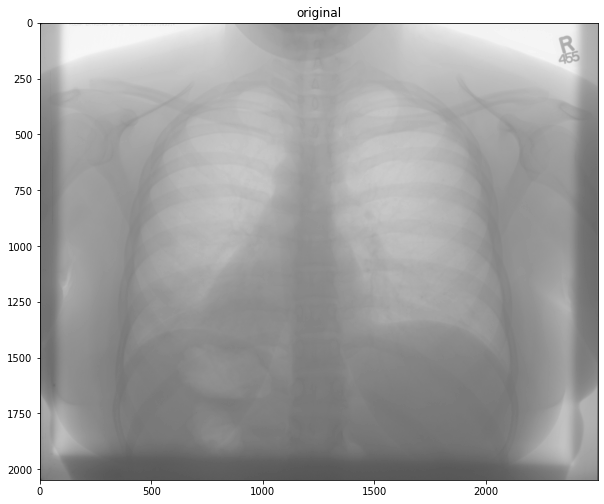

In [52]:
img = np.array(new_arr, dtype='float')
plt.figure(figsize=(10,10))
plt.title('original')
plt.imshow(img, cmap='gray')

In [11]:
img = cv.imread(r'D:\study\moed2\1lab\grace.jpg')
img = np.array(img)/255
img = img[:,:,2]
print(img.shape)

(360, 480)


In [3]:
def show_picture(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        cv.waitKey(0)
        cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

In [4]:
def show_picture_plot(image, title: str='window_name'):
    try:
        plt.figure(figsize=(10,10))
        plt.title(title)
        plt.imshow(image, cmap='gray')
    except Exception :
        # cv.destroyAllWindows()
        print('error')

In [5]:
# path = r"D:\study\moed2\3lab\p1.jpg"
# path = r"D:\study\moed2\3lab\p2.jpg"
# path = r"D:\study\moed2\3lab\p3.jpg"
# path = r"D:\study\moed2\3lab\p4.jpg"
# path = r"D:\study\moed2\3lab\p5.jpg"
# path = r'D:\study\moed2\1lab\grace.jpg'
# path = r"D:\study\moed2\2lab\c12-85v.png"
path = r"D:\study\moed2\2lab\u0.png"

img = cv.imread(path)
print(img.shape)
img = img[:,:,2]
print(img.shape)


(2048, 2500, 3)
(2048, 2500)


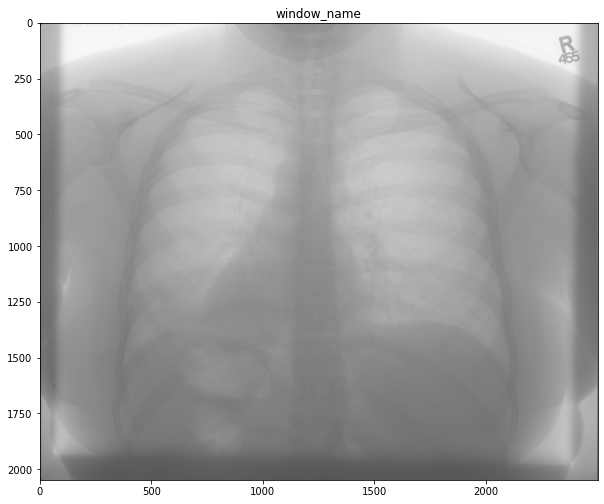

In [6]:
# show_picture(img)
show_picture_plot(img)

In [7]:
def transform_image_size(image, size:float=1):
    # try:
        new_image = []
        if len(img.shape)==2:
            start_time = time.time()
            # print('orig shape', image.shape)
            image=np.array(image)
            x_len, y_len = img.shape[0], img.shape[1]

            x_len_n = x_len*size
            y_len_n = y_len*size

            dt = 1/size
            indexes_x = np.array(np.arange(0,x_len_n)*dt).astype('int')
            indexes_y = np.array(np.arange(0,y_len_n)*dt).astype('int')
            new_image = image[indexes_x,:]
            new_image = new_image[:,indexes_y]
            # for i in range(int(x_len_n)):
            #     new_row = []
            #     for e in range(int(y_len_n)):
            #         # print()
            #         new_row.append(image[int(dt*i), int(dt*e)])
            #     new_image.append(new_row)

            result = np.array(new_image)
            # print('time', time.time()-start_time)
            # print('orig shape', result.shape)
            return result

    # except Exception:
    #     cv.destroyAllWindows()
    #     print('error')

In [31]:
mas = np.ones((10,10))*np.arange(10)
mas_i = np.array(np.arange(0,14)*0.3).astype('int')
mas_i_r = np.around(np.arange(0,14)*0.3).astype('int')
mas_i2 = np.array(np.arange(0,15)*0.3).astype('int')
# print(mas)
print(mas_i)
print(mas_i+1)
# tmp = mas[mas_i, :]
# tmp = tmp[:, mas_i2]
# print(tmp)

[0 0 0 0 1 1 1 2 2 2 3 3 3 3]
[1 1 1 1 2 2 2 3 3 3 4 4 4 4]


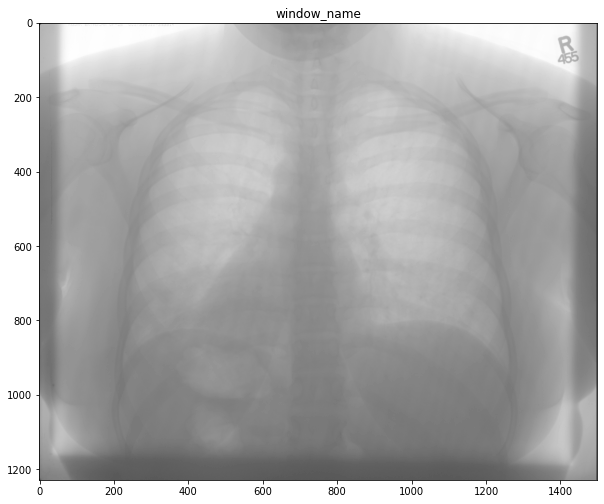

In [8]:
transf_image = transform_image_size(img,0.6)
# show_picture(transf_image)
show_picture_plot(transf_image)

In [9]:
# path_save = r"D:\study\moed2\3lab\p1.jpg"
# path_save = r"D:\study\moed2\3lab\p2.jpg"
# path_save = r"D:\study\moed2\3lab\p3.jpg"
# path_save = r"D:\study\moed2\3lab\p4.jpg"
# path_save = r"D:\study\moed2\3lab\p5.jpg"
# path_save = r'D:\study\moed2\1lab\grace.jpg'
# path_save = r"D:\study\moed2\2lab\c12-85v.png"
path_save = r"D:\study\moed2\2lab\u0_0.6.png"
cv.imwrite(path_save, transf_image)

True

In [26]:
scale_max = 1.5
title_window = 'scale image'
def on_trackbar(val):
    val/=100.
    transf_image = transform_image_size(img,val)
    show_picture(transf_image)

cv.namedWindow(title_window)
trackbar_name = 'scale size %d' % scale_max
cv.createTrackbar(trackbar_name, title_window , int(0.5*100), int(scale_max*100), on_trackbar)
# Show some stuff
on_trackbar(int(1.*100))

In [55]:
def transform_image_size_bilinear(image, size:float=1):
    # try:
        new_image = []
        if len(image.shape)==2:
            start_time = time.time()
            # print('orig shape', image.shape)
            image=np.array(image)
            x_len, y_len = image.shape[0], image.shape[1]

            x_len_n = x_len*size
            y_len_n = y_len*size

            dt = 1/size
            # indexes_x = np.array(np.arange(0,x_len_n)*dt).astype('int')
            # indexes_x_p = indexes_x+1
            # indexes_y = np.array(np.arange(0,y_len_n)*dt).astype('int')
            # indexes_y_p = indexes_y+1
            # new_image = image[indexes_x,:]
            # new_image = new_image[:,indexes_y]
            # for i in range(int(x_len_n)):
            #     new_row = []
            #     for e in range(int(y_len_n)):
            #
            #         ld = image[int(dt*i), int(dt*e)]
            #         rd = image[(int(dt*i)+1)%x_len, int(dt*e)]
            #         lu = image[int(dt*i), (int(dt*e)+1)%y_len]
            #         ru = image[(int(dt*i)+1)%x_len, (int(dt*e)+1)%y_len]
            #         new_row.append((ld+rd+lu+ru)*.25)
            #     new_image.append(new_row)
            new_image = cv.resize(img, (int(y_len_n), int(x_len_n)), interpolation=cv.INTER_LINEAR)
            result = np.array(new_image)
            # print('time', time.time()-start_time)
            # print('orig shape', result.shape)
            return result

In [35]:
def gray_image(image):
    mx = np.max(image)
    mn = np.min(image)
    amp = mx-mn
    img_restore_shift = ((image-mn)/amp)
    return img_restore_shift

1.0
0.0


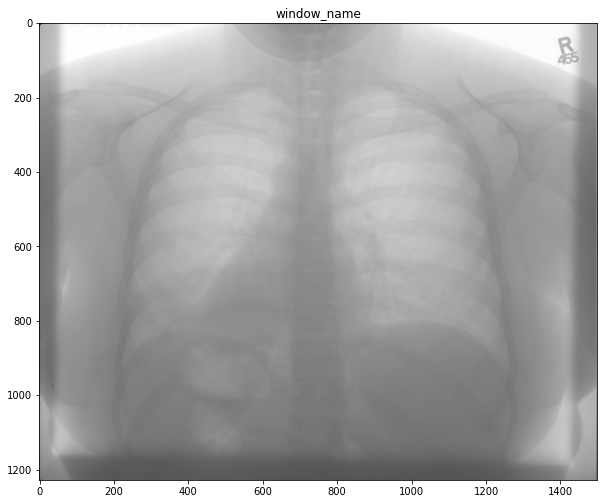

In [56]:
transf_image = transform_image_size_bilinear(img,0.6)
transf_image = gray_image(transf_image)
print(np.max(transf_image))
print(np.min(transf_image))
# show_picture(transf_image)
show_picture_plot(transf_image)